# Load the Dataset

In [1]:
cd /Users/rodrickleary/Downloads

/Users/rodrickleary/Downloads


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('premier_league_2016_2017.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 20 columns):
date                          760 non-null object
full_time_goal_difference     760 non-null int64
full_time_goals_conceded      760 non-null int64
full_time_goals_scored        760 non-null int64
full_time_result              760 non-null object
half_time_goal_difference     760 non-null int64
half_time_goals_conceded      760 non-null int64
half_time_goals_scored        760 non-null int64
half_time_result              760 non-null object
is_home_match                 760 non-null bool
match_id                      760 non-null int64
opponent_name                 760 non-null object
team_name                     760 non-null object
team_rating                   760 non-null float64
aggregated_points             760 non-null int64
aggregated_goals_scored       760 non-null int64
aggregated_goals_conceded     760 non-null int64
aggregated_goal_difference    760 non-null int64
game_no

# Apply dimensionality reduction techniques to visualize the observations.

In [4]:
from sklearn.preprocessing import StandardScaler
features = ['full_time_goal_difference', 'half_time_goal_difference', 'team_rating', 'aggregated_points', 'aggregated_goal_difference', 'standing']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,'full_time_result'].values
# Standardizing the features
x_std = StandardScaler().fit_transform(x)

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_std)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [6]:
finalDf = pd.concat([principalDf, df[['full_time_result']]], axis = 1)

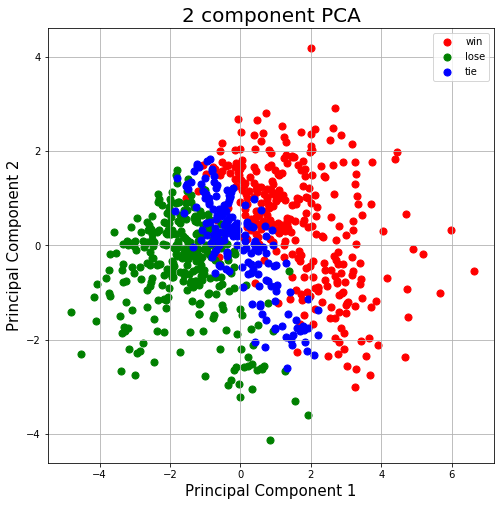

In [7]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['win', 'lose', 'tie']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['full_time_result'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

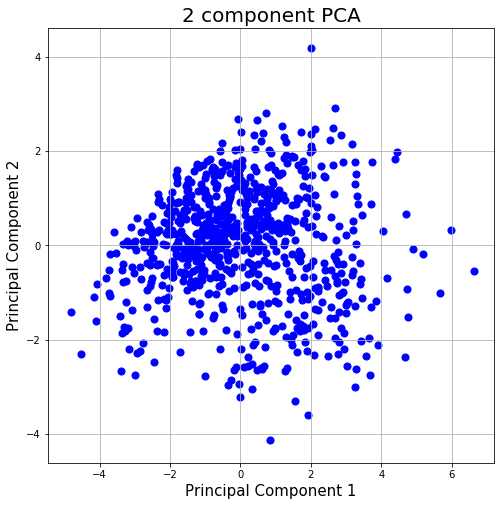

In [8]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['win', 'lose', 'tie']
colors = ['b', 'b', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['full_time_result'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.grid()

In [9]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(x_std)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 760 samples in 0.001s...
[t-SNE] Computed neighbors for 760 samples in 0.021s...
[t-SNE] Computed conditional probabilities for sample 760 / 760
[t-SNE] Mean sigma: 0.631321
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.132977
[t-SNE] KL divergence after 300 iterations: 0.856394


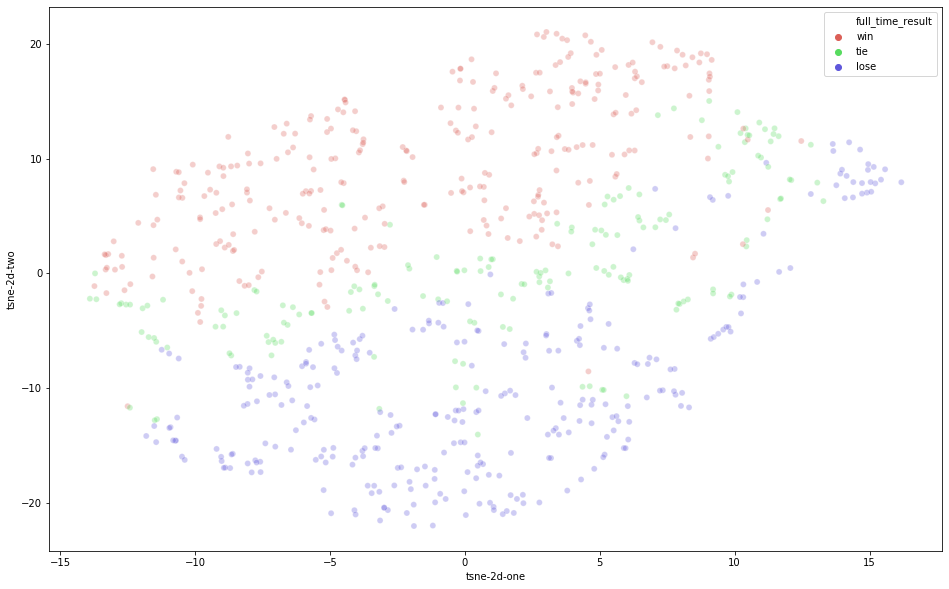

In [10]:
df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="full_time_result",
    palette=sns.color_palette("hls", 3),
    data=df,
    legend="full",
    alpha=0.3
)

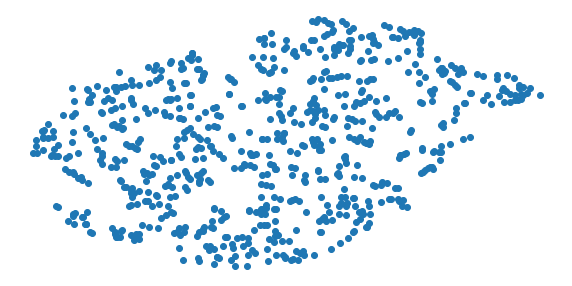

In [11]:
plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [12]:
import umap
umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=.3,
                      metric='correlation').fit_transform(x_std)

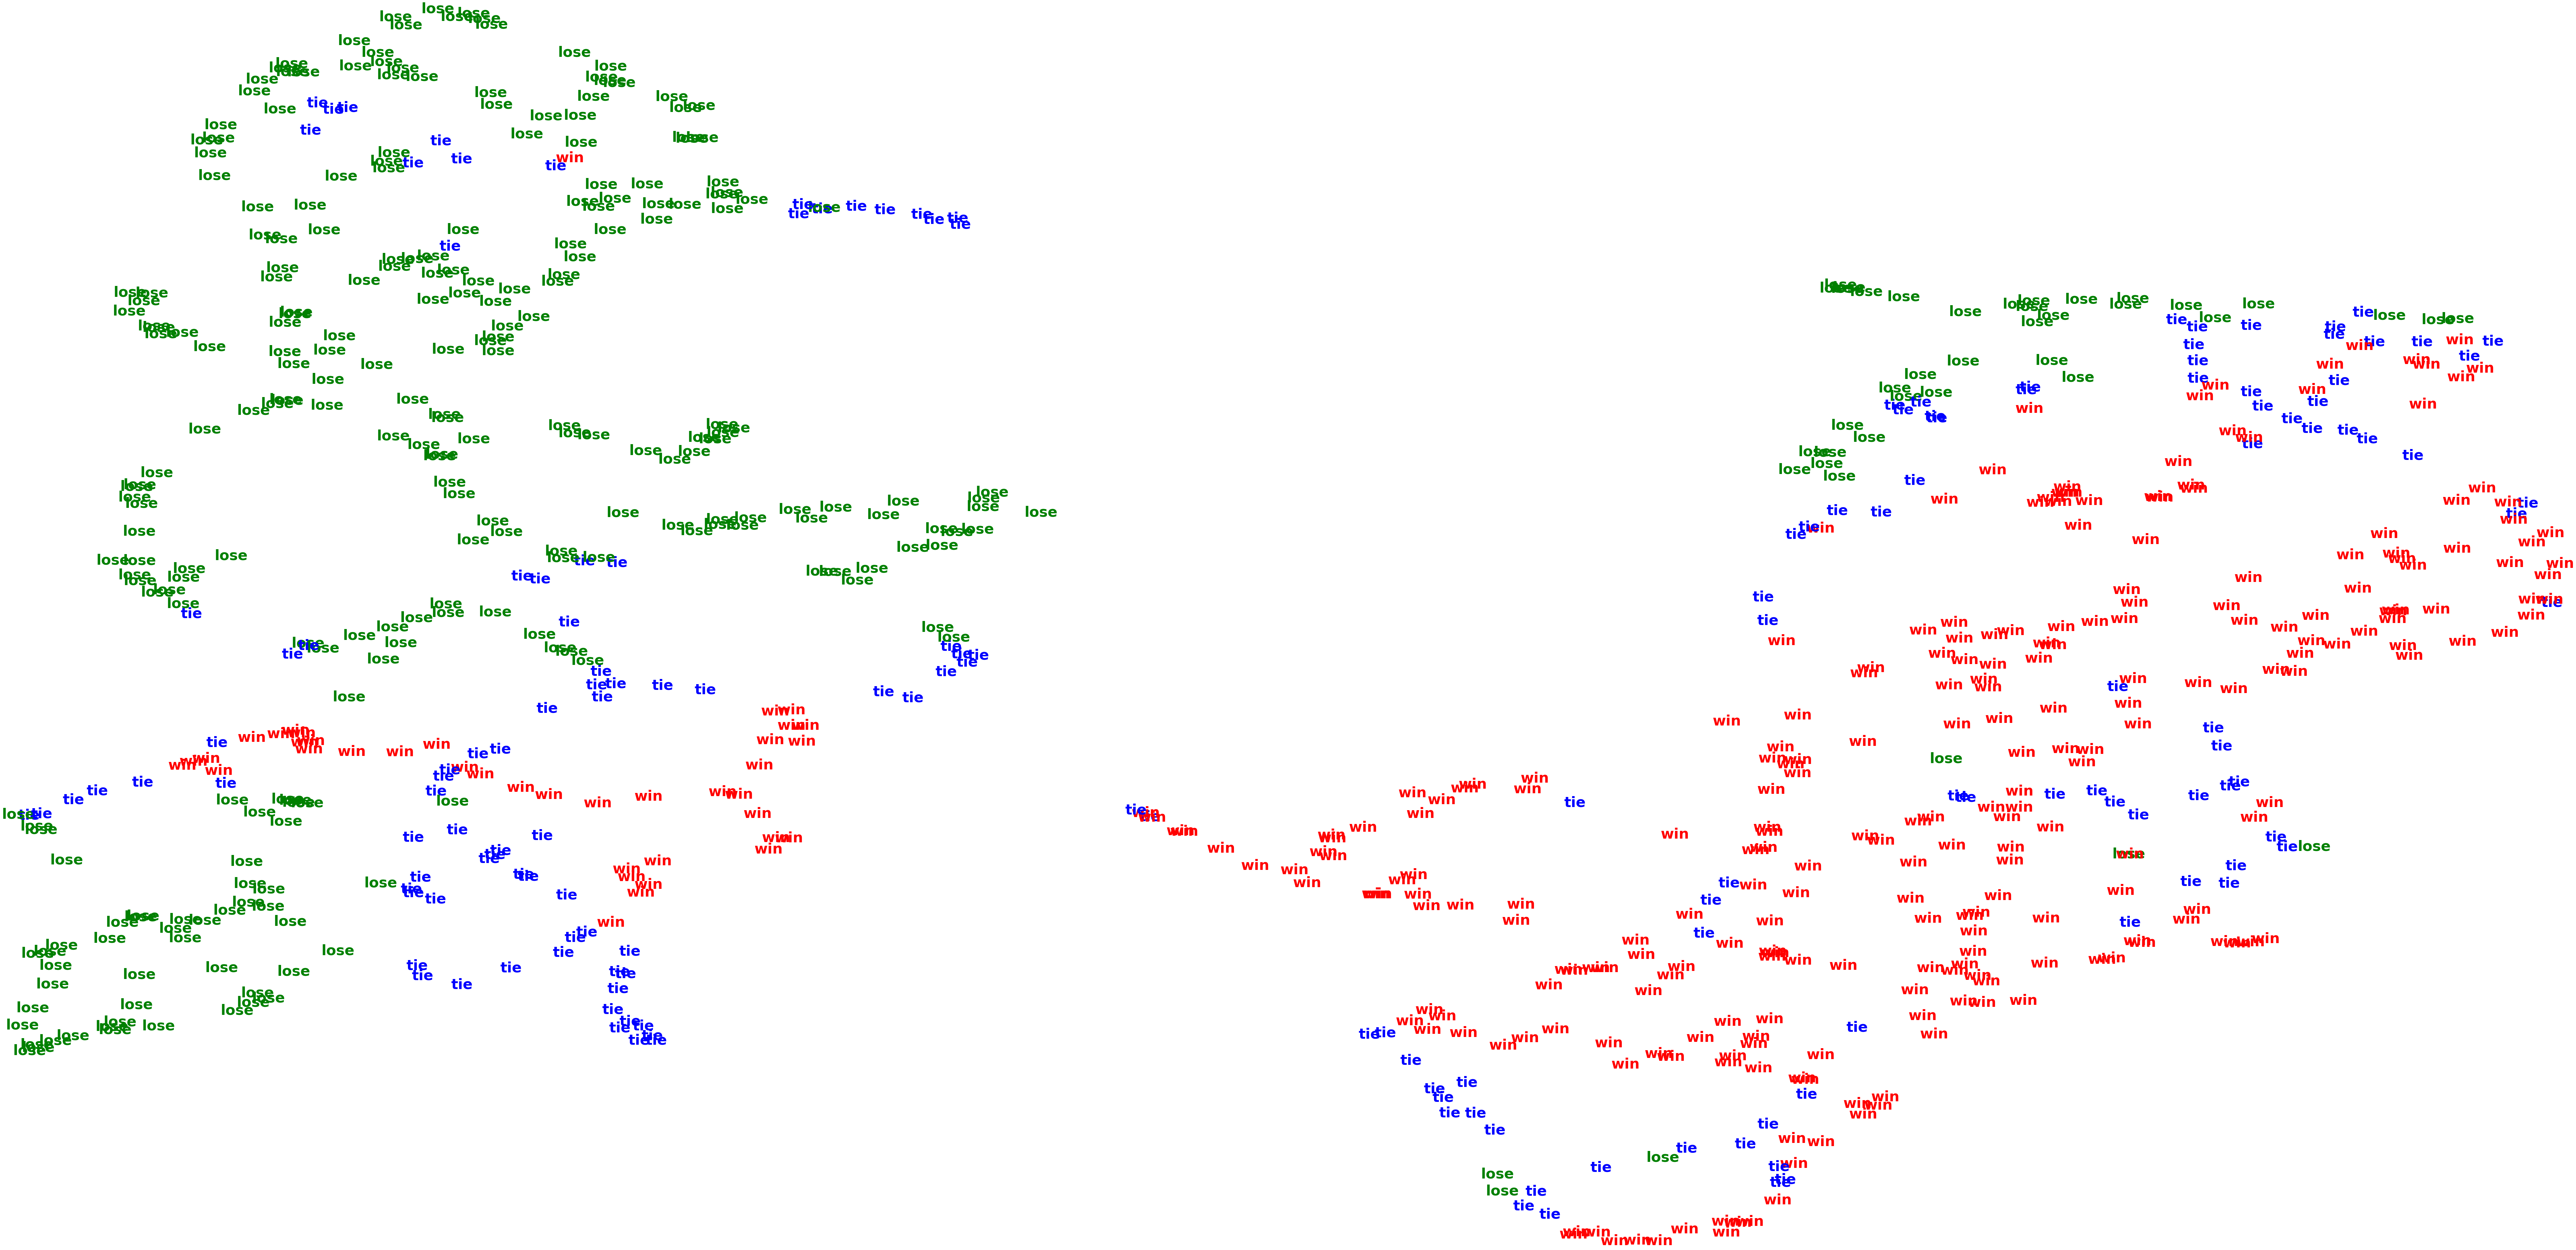

In [13]:
plt.figure(figsize=(10,5))
colors = {"win": "r", "tie": "b", "lose": "g"}
for i in range(umap_results.shape[0]):
    plt.text(umap_results[i, 0], umap_results[i, 1], y[i],
             color=colors[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

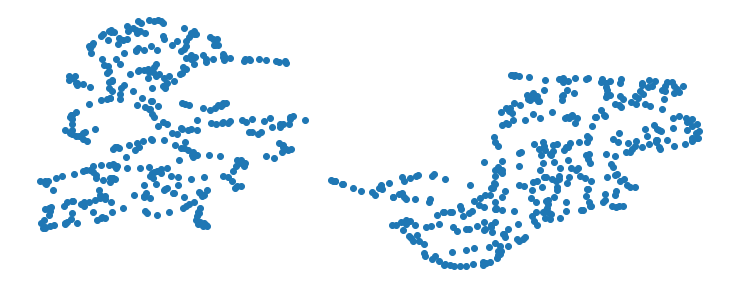

In [14]:
plt.figure(figsize=(13,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

UMAP's solution is better than those of PCA's and t-SNE's because the different classes are separated more clearly.

# Apply clustering techniques to group together similar observations.

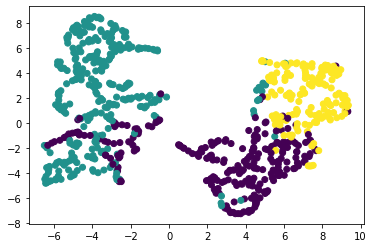

In [15]:
from sklearn.cluster import KMeans, MiniBatchKMeans
y_pred = KMeans(n_clusters=3, random_state=123).fit_predict(x_std)
plt.scatter(umap_results[:, 0], umap_results[:, 1], c=y_pred)
plt.show()

In [16]:
from sklearn import metrics
pred_3 = KMeans(n_clusters=3, random_state=123).fit_predict(x_std)
print("ARI for three cluster k-means: {}".format(
    metrics.adjusted_rand_score(y, pred_3)))

ARI for three cluster k-means: 0.41636874401736307


In [17]:
print(metrics.silhouette_score(x_std, pred_3, metric='euclidean'))

0.2873723639432937


In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                      n_clusters=3)

clusters = agg_cluster.fit_predict(x_std)

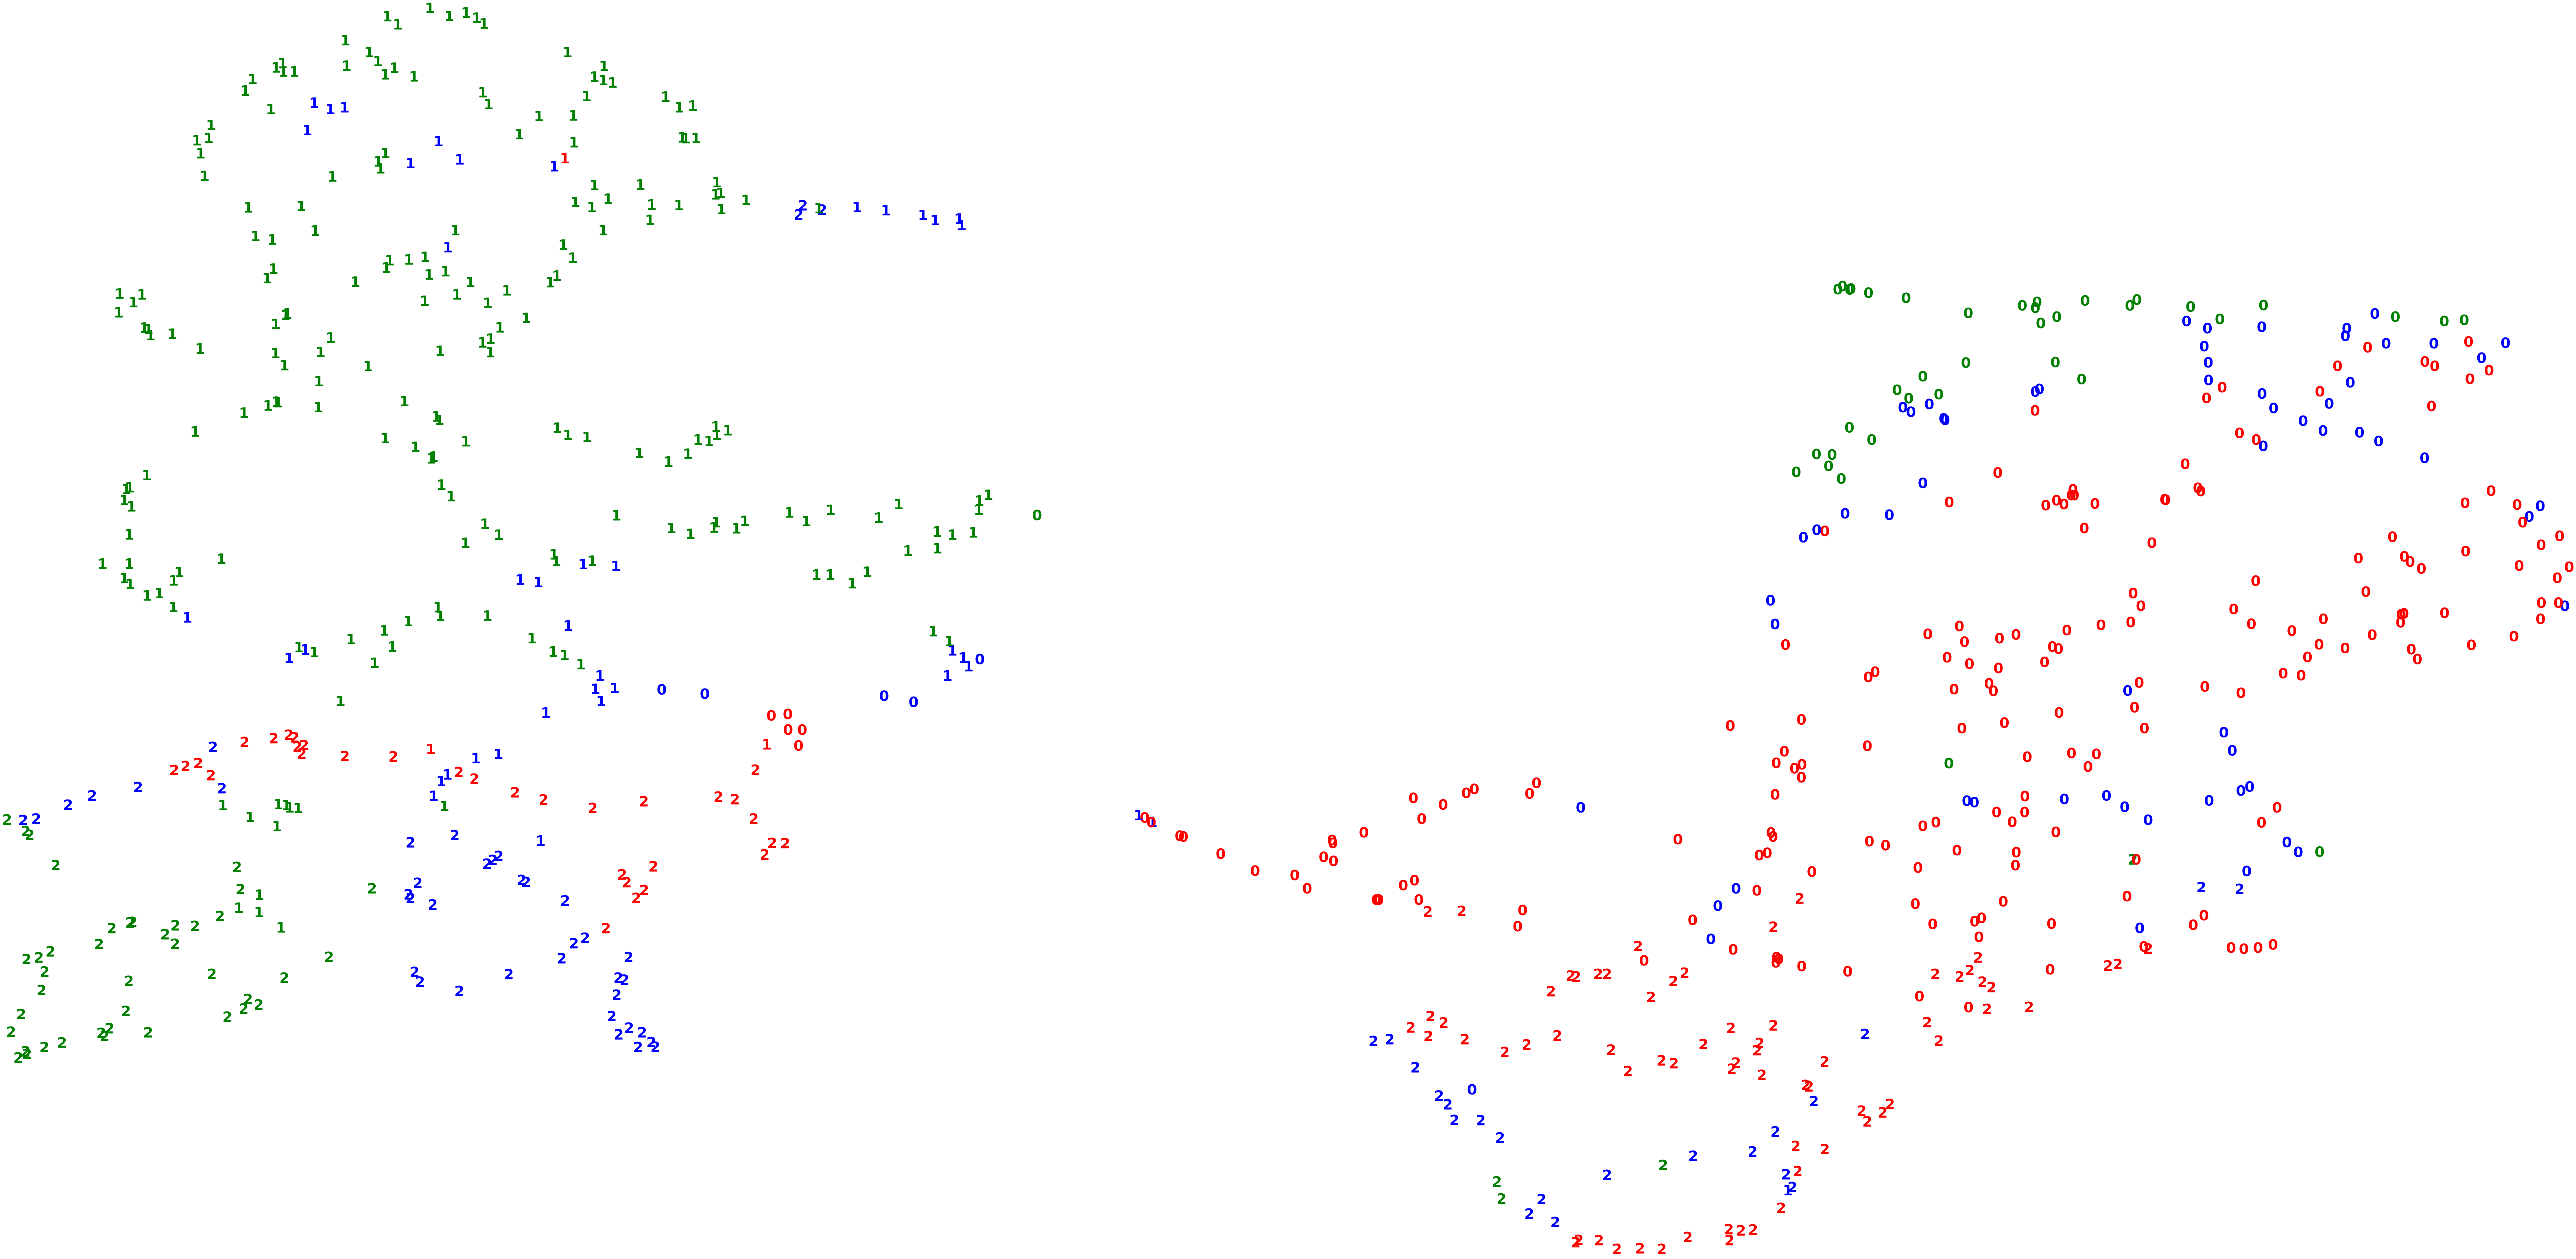

In [19]:
plt.figure(figsize=(10,5))
colors = {"win": "r", "tie": "b", "lose": "g"}
for i in range(umap_results.shape[0]):
    plt.text(umap_results[i, 0], umap_results[i, 1], str(clusters[i]),
             color=colors[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [20]:
print("Adjusted Rand Index of the Agglomerative Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhoutte score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(x_std, clusters, metric='euclidean')))

Adjusted Rand Index of the Agglomerative Clustering solution: 0.2778101077101773
The silhoutte score of the Agglomerative Clustering solution: 0.1940878959179017


In [21]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(x_std)
distances, indices = nbrs.kneighbors(x_std)

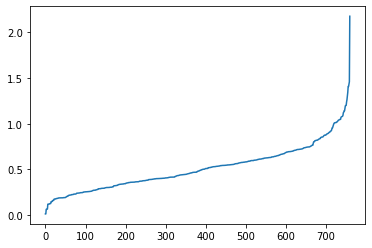

In [22]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [23]:
from sklearn.cluster import DBSCAN
dbscan_cluster = DBSCAN(eps=1, min_samples=3)

clusters = dbscan_cluster.fit_predict(x_std)

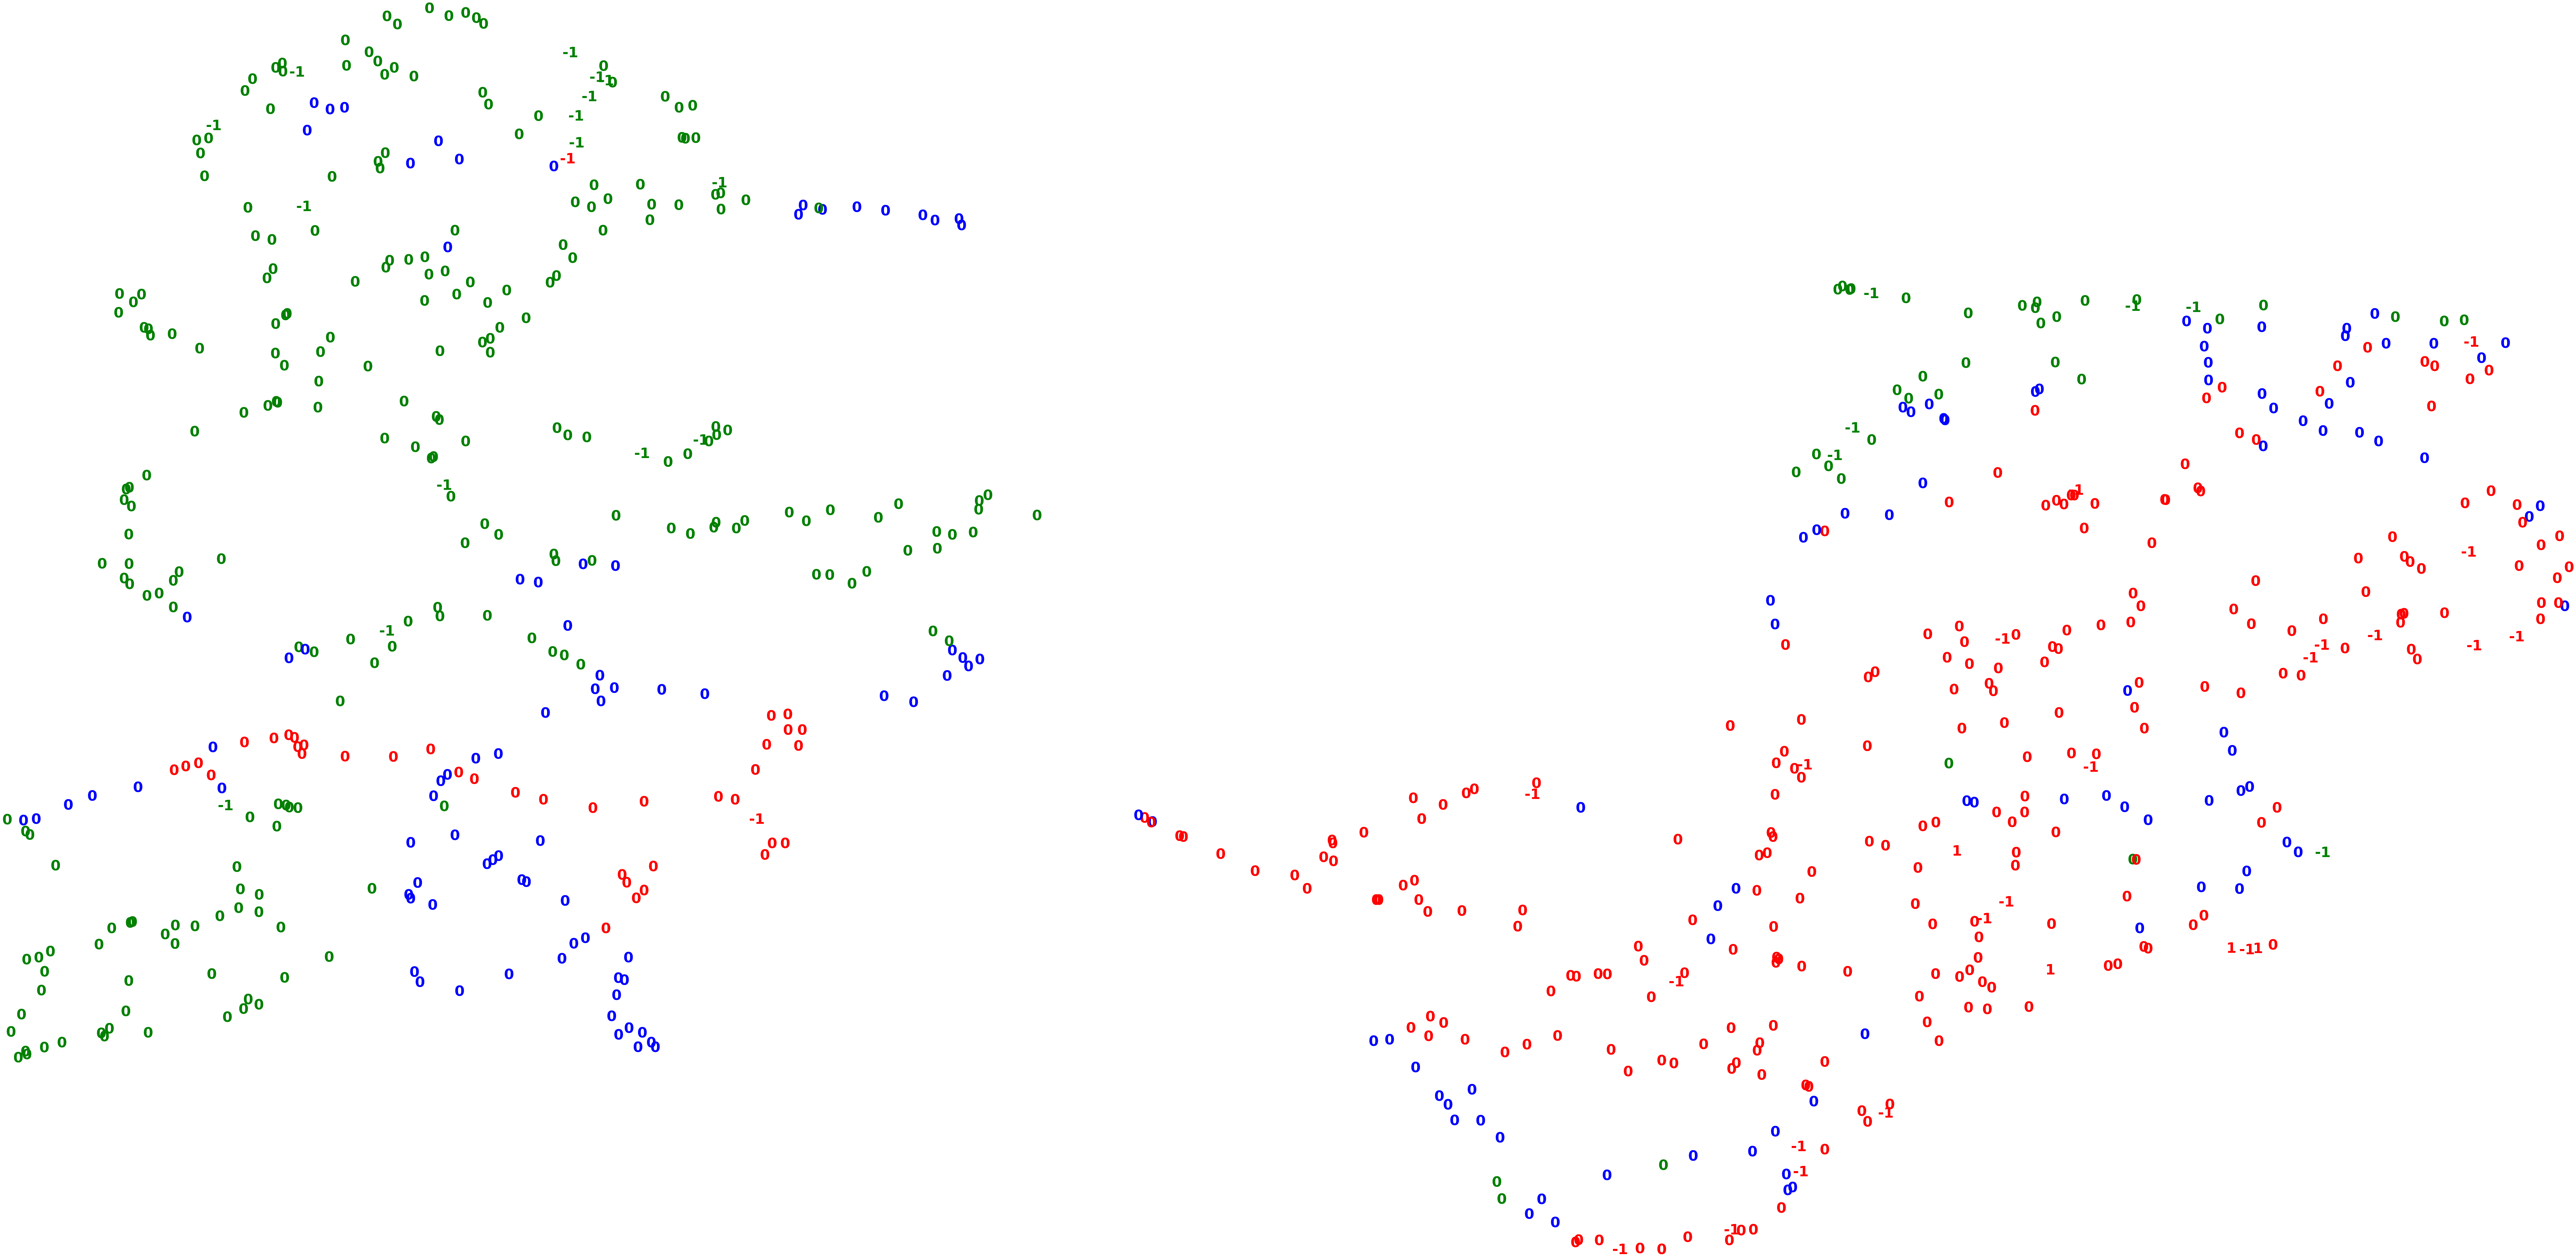

In [24]:
plt.figure(figsize=(10,5))
colors = {"win": "r", "tie": "b", "lose": "g"}
for i in range(umap_results.shape[0]):
    plt.text(umap_results[i, 0], umap_results[i, 1], str(clusters[i]),
             color=colors[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [25]:
print("Adjusted Rand Index of the DBSCAN solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))

Adjusted Rand Index of the DBSCAN solution: -0.01197588778128294


In [26]:
print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(x_std, clusters, metric='euclidean')))

The silhouette score of the DBSCAN solution: 0.1638365015194077


In [27]:
from sklearn.mixture import GaussianMixture
gmm_cluster = GaussianMixture(n_components=3, random_state=123)

clusters = gmm_cluster.fit_predict(x_std)

In [28]:
print("Adjusted Rand Index of the GMM solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhoutte score of the GMM solution: {}"
      .format(metrics.silhouette_score(x_std, clusters, metric='euclidean')))

Adjusted Rand Index of the GMM solution: 0.07634091422095489
The silhoutte score of the GMM solution: 0.11510189789076769


In [29]:
gmm_cluster = GaussianMixture(n_components=3, random_state=123, covariance_type="full")

clusters = gmm_cluster.fit_predict(x_std)

print("ARI score with covariance_type=full: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score with covariance_type=full: {}".format(
    metrics.silhouette_score(x_std, clusters, metric='euclidean')))
print("------------------------------------------------------")

gmm_cluster = GaussianMixture(n_components=3, random_state=123, covariance_type="tied")

clusters = gmm_cluster.fit_predict(x_std)

print("ARI score with covariance_type=tied: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score with covariance_type=tied: {}".format(
    metrics.silhouette_score(x_std, clusters, metric='euclidean')))
print("------------------------------------------------------")

gmm_cluster = GaussianMixture(n_components=3, random_state=123, covariance_type="diag")

clusters = gmm_cluster.fit_predict(x_std)

print("ARI score with covariance_type=diag: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score with covariance_type=diag: {}".format(
    metrics.silhouette_score(x_std, clusters, metric='euclidean')))
print("------------------------------------------------------")


gmm_cluster = GaussianMixture(n_components=3, random_state=123, covariance_type="spherical")

clusters = gmm_cluster.fit_predict(x_std)

print("ARI score with covariance_type=spherical: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score with covariance_type=spherical: {}".format(
    metrics.silhouette_score(x_std, clusters, metric='euclidean')))
print("------------------------------------------------------")

ARI score with covariance_type=full: 0.07634091422095489
Silhouette score with covariance_type=full: 0.11510189789076769
------------------------------------------------------
ARI score with covariance_type=tied: 0.09266589232653145
Silhouette score with covariance_type=tied: 0.2088620024221438
------------------------------------------------------
ARI score with covariance_type=diag: 0.39940184143178564
Silhouette score with covariance_type=diag: 0.2733609406519984
------------------------------------------------------
ARI score with covariance_type=spherical: 0.41196807126512125
Silhouette score with covariance_type=spherical: 0.28545875774677243
------------------------------------------------------


The Kmeans model scores higher than all other models on ARI and Silhouette score.

# Discuss how dimensionality reduction and clustering algorithms enable you to gain insights regarding the data.

Dimensionality reduction allows for the visualization of the data while keeping as much of the associations, relations and information as possible. Dimensionality reduction also allows us to prevent the curse of dimensionality wherby the runtime of algorithms increases for each additional feature added to the model.

Clustering allows us to gain insight into the data by grouping observations in such a way that observations within a cluster have more in common with observations they are clustered with than observations outside of their cluster. Additionally, clustering can allow us to group high dimensionality datasets into a smaller number of potentially meaningful clusters.